### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [10]:
def importData(path, predictColumn=False):
    columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    #columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    if predictColumn:
        x=data.iloc[:, 1:-1].values
        y=data['FP'].values
        return x, y
    else:
        x=data.iloc[:,:].values
        return x

In [25]:
#pathTrain='../3-DataSet/dataFinale/p25/traintSet_p25.csv'
pathTrain='../3-DataSet/dataFinale/p27/traintSet_p27.csv'
#pathTrain='../3-DataSet/dataFinale/p30/traintSet_p30.csv'
X_train, y_train = importData(pathTrain,True)

#pathTest='../3-DataSet/dataFinale/p25/testSet_p25.csv'
pathTest='../3-DataSet/dataFinale/p27/testSet_p27.csv'
#pathTest='../3-DataSet/dataFinale/p30/testSet_p30.csv'
X_test, y_test = importData(pathTest,True)

### Normalisation et mise en echelle
Avant de faire des prédictions réelles, il est toujours recommandé de mettre à l'échelle les entités afin que toutes puissent être évaluées uniformément. 
L'algorithme de descente de gradient (qui est utilisé dans la formation de réseaux de neurones et d'autres algorithmes d'apprentissage automatique) converge également plus rapidement avec des fonctionnalités normalisées.
![](scaling.JPG)

In [26]:
from sklearn.preprocessing import StandardScaler

def scaleData(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)


X_train = scaleData(X_train)
X_test = scaleData(X_test)

### Recheche du point omptimal
Avant de passer à la prediction, nous allons chercher le point optimal pour le nombre de voisin par element.

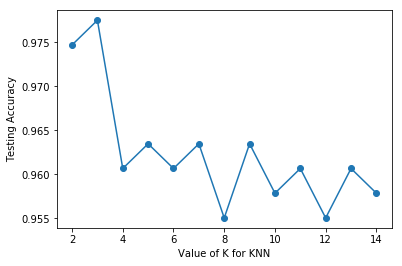

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def plotOptimalNeighbors():
    errors = []
    scores=[]
    for k in range(2,15):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_p = knn.predict(X_test)
        #errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
        scores.append(metrics.accuracy_score(y_test, y_p))
    #plt.plot(range(2,15), errors, 'o-')
    plt.plot(range(2,15), scores, 'o-')
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    plt.show()

plotOptimalNeighbors()

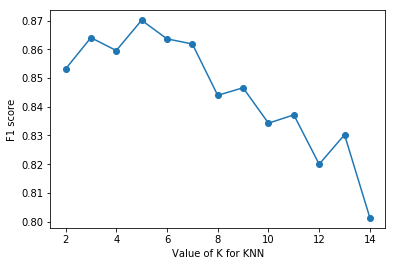

In [190]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(2,15):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)
    
plt.plot(k_list, f1_list, 'o-')
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score')
plt.show()

### Classification & prediction
Il est extrêmement simple de former l''algorithme KNN et de faire des prédictions avec lui, en particulier lors de l''utilisation de Scikit-Learn.
La première étape consiste à importer la KNeighborsClassifierclasse depuis la `sklearn.neighbors` bibliothèque. Dans la deuxième ligne, cette classe est initialisée avec un paramètre, ie 'n_neigbours. Il s'agit essentiellement de la valeur de K. Il n'y a pas de valeur idéale pour K et elle est sélectionnée après test et évaluation, mais pour commencer, 5 semble être la valeur la plus couramment utilisée pour l'algorithme KNN.

In [28]:
#Classification
k=3
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
#prediction
y_pred = knn.predict(X_test)

## Evaluation
Pour évaluer un algorithme, la matrice de confusion, la précision, le rappel et le score f1 sont les mesures les plus couramment utilisées. Les méthodes confusion_matrixet classification_reportde sklearn.metricspeuvent être utilisées pour calculer ces métriques. Jetez un œil au script suivant:

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

def showConfusionMatrix(ytest,ypred):
    print("Confusion Matrix \n",confusion_matrix(ytest, ypred))
    print("Repport: \n",classification_report(ytest, ypred))
    
def showScore(knn, xtest, ytest):
    print('Score: %f' % knn.score(xtest,ytest))
    print('Erreur: %f' % (1-knn.score(xtest,ytest)))
    
def printMetrics(yTest, yPred):
    print("Accuracy: ", metrics.accuracy_score(yTest, yPred))
    print("Ajusted Rand Square",metrics.adjusted_rand_score(yTest, yPred))

In [32]:
showConfusionMatrix(y_test,y_pred)
showScore(knn, X_test,y_test)
printMetrics(y_test,knn)

Confusion Matrix 
 [[328   0]
 [  8  20]]
Repport: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       328
          1       1.00      0.71      0.83        28

avg / total       0.98      0.98      0.98       356

Score: 0.977528
Erreur: 0.022472


NameError: name 'printMetrics' is not defined

### Plot
Nous allos afficher les éléments et leur comportement après prediction

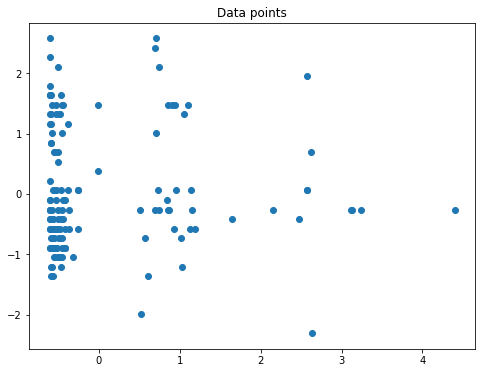

In [20]:
h = .02  # step size in the mesh

# Calculate min, max and limits
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure(figsize=(8, 6))
#ax = plt.fig.add_subplot(111)

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")

#plt.contourf(xx,yy,[[]],cmap=plt.cm.PRGn)
plt.axis('tight')
# Plot your testing points as wel
#for label in np.unique(y_test):
#    indices = np.where(y_test == label)
#    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
#                label='FP {}'.format(label))#


plt.legend(loc='lower right')

plt.show()

### Predict other Data
Nous allons maintenant tester la prédiction d'autres données qui ne sont pas les tests

In [28]:
#LoadData
path='../3-DataSet/20200122/95/testSets95.csv'

#path='../2-TransformedData/data2_2020-Jan-31-10_55_51.csv'
toPredict = pd.read_csv(path,names=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"], sep=',')
def scaleData2(data):
    data=data[1:]
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

#scaled_data = scaleData2(toPredict)

#prediction
new_pred = knn.predict(scaled_data)


#print('Prediction: ',new_pred)


#ShowScore
#showScore(knn, X_test,new_pred)
#print('Score: %f' % knn.score(X_test,new_pred))
#toPredict.columns=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"]
toPredict['IS_FP']=new_pred
#toPredict.set_option('display.max_rows',73)
toPredict

ValueError: query data dimension must match training data dimension

In [62]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=20)
#print each cv score (accuracy) and average them
print('Cross validation score\n',cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


Cross validation score
 [ 1.          0.875       0.75        0.875       0.875       0.75        0.875
  0.75        0.75        0.71428571  0.71428571  0.85714286  0.85714286
  0.85714286  0.85714286  0.85714286  0.85714286  0.85714286  0.85714286
  0.5       ]
cv_scores mean:0.8142857142857144


In [109]:
#Export predict data
pathExport='../6-ClassifiedData/knn_predict_30_2.csv'
toPredict.to_csv(pathExport, index = None, header=True)